## Observations and Insights 

In [1]:
# Observations

# 1. The sex of the mice were controlled in the research as there are 50%-50% male and female mice.
# 2. Capomulin and Ceftamin are more effective in reducing tumor volume, compared with Ramicane and Infubinol.
# 3. There is a positive correlation between weight and tumor volume.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, how = "outer", on = "Mouse ID")

# Display the data table for preview
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = df.loc[df.duplicated(subset = ["Mouse ID", "Timepoint"], keep=False) == True]["Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = df.loc[df["Mouse ID"].isin(duplicate_ID) == True]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df["Mouse ID"].isin(duplicate_ID) == False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_regimen = clean_df.groupby(["Drug Regimen"])

mean = grouped_regimen["Tumor Volume (mm3)"].mean()
median = grouped_regimen["Tumor Volume (mm3)"].median()
variance = grouped_regimen["Tumor Volume (mm3)"].var()
std= grouped_regimen["Tumor Volume (mm3)"].std()
SEM = grouped_regimen["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Mean Tumor Volum": mean,
                           "Median Tumor Volume": median,
                           "Tumor Volume Variance": variance,
                           "Tumor Volume Std. Dev.": std,
                           "Tumor Volume Std. Err.": SEM})

summary

,Mean Tumor Volum,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregation = clean_df["Tumor Volume (mm3)"].agg(['sum'])

aggregation

sum    94818.351277
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Unique Mice Tested'>

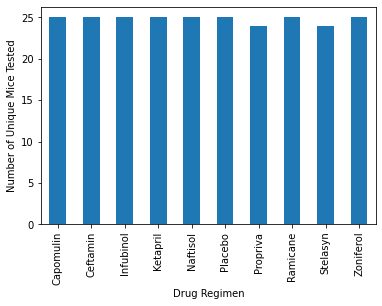

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

unique_count = grouped_regimen["Mouse ID"].nunique()

bar_chart = unique_count.plot(kind ="bar")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Unique Mice Tested")

bar_chart

Text(0, 0.5, 'Number of Unique Mice Tested')

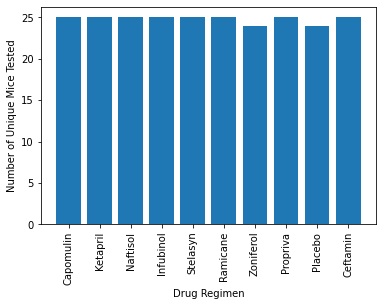

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x = clean_df["Drug Regimen"].unique()
y = pd.DataFrame({"Count": grouped_regimen["Mouse ID"].nunique()})["Count"]

plt.bar(x,y, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

Text(0, 0.5, 'Sex')

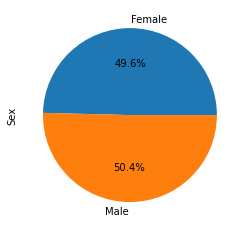

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

group_gender = clean_df.groupby(["Sex"])

size = pd.DataFrame({"Count": group_gender["Mouse ID"].nunique()})["Count"]

plot = size.plot.pie(autopct="%1.1f%%")

plot.set_ylabel("Sex")

Text(0, 0.5, 'Sex')

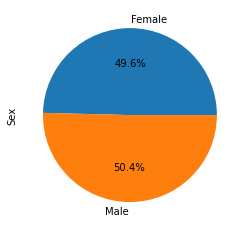

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

size = size.reset_index()

plt.pie(size["Count"], labels = size["Sex"], autopct="%1.1f%%")

plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Specific_Regimens = clean_df

Specific_Regimens["Last?"] = Specific_Regimens["Timepoint"].where(Specific_Regimens["Drug Regimen"] == Specific_Regimens["Drug Regimen"]).groupby(Specific_Regimens["Mouse ID"]).transform("max")

Specific_Regimens = Specific_Regimens.loc[Specific_Regimens["Timepoint"] == Specific_Regimens["Last?"]]

Specific_Regimens = Specific_Regimens.iloc[:, 0:8]

Specific_Regimens

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


<ipython-input-14-2c7a7dc9bcba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Specific_Regimens["Last?"] = Specific_Regimens["Timepoint"].where(Specific_Regimens["Drug Regimen"] == Specific_Regimens["Drug Regimen"]).groupby(Specific_Regimens["Mouse ID"]).transform("max")


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1867,i557,45,47.685963,1,Capomulin,Female,1,24
1877,m957,45,33.329098,1,Capomulin,Female,3,19
1882,f966,20,30.485985,0,Capomulin,Male,16,17


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

for x in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:

    # Create empty list to fill with tumor vol data (for plotting)
    Tumor_Vol_Data = Specific_Regimens.loc[Specific_Regimens["Drug Regimen"] == x]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    Q1 = Tumor_Vol_Data["Tumor Volume (mm3)"].quantile(.25)
    Q2 = Tumor_Vol_Data["Tumor Volume (mm3)"].quantile(.5)
    Q3 = Tumor_Vol_Data["Tumor Volume (mm3)"].quantile(.75)
    IQR = Q3 - Q1
    
    outlier_lower_boundary = Q1 - 1.5*IQR
    outlier_higher_boundary = Q3 + 1.5*IQR


    # Determine outliers using upper and lower bounds
    Outlier_df = Tumor_Vol_Data.loc[(Tumor_Vol_Data["Tumor Volume (mm3)"] >= outlier_higher_boundary) | (Tumor_Vol_Data["Tumor Volume (mm3)"] <= outlier_lower_boundary)]
    Outlier = Outlier_df["Tumor Volume (mm3)"]

    print(f"{x}'s potential outliers: {Outlier}")

#     print(f"{x}'s potential outliers")
#     print(f"Q1: {Q1}")
#     print(f"Q2: {Q2}")
#     print(f"Q3: {Q3}")
#     print(f"LOWER: {outlier_lower_boundary}")
#     print(f"HIGHER: {outlier_higher_boundary}")
#     print(Tumor_Vol_Data["Tumor Volume (mm3)"])

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


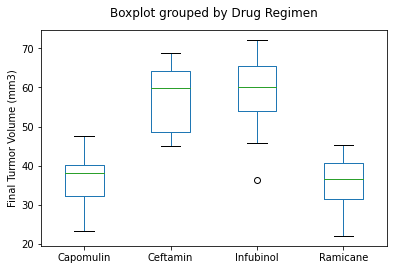

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

dataframe = Specific_Regimens.loc[Specific_Regimens["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

boxplot = dataframe.boxplot(column=["Tumor Volume (mm3)"], by="Drug Regimen")

boxplot.set_xlabel("")
boxplot.set_ylabel("Final Turmor Volume (mm3)")
boxplot.set_title("")
boxplot.grid(False)

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

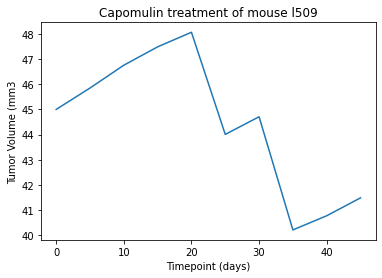

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

line_chart = capomulin_df.loc[clean_df["Mouse ID"] == "l509"].plot.line(x="Timepoint", y="Tumor Volume (mm3)", legend=False)
line_chart.set_xlabel("Timepoint (days)")
line_chart.set_ylabel("Tumor Volume (mm3")
line_chart.set_title("Capomulin treatment of mouse l509")

Text(0, 0.5, 'Average Tumor Volume (mm3')

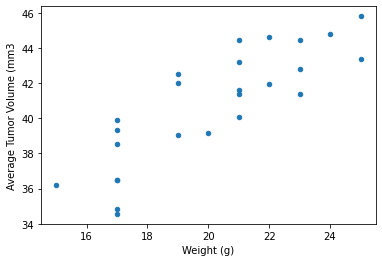

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor_volume_df = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

weight_df = capomulin_df[{"Mouse ID", "Weight (g)"}].drop_duplicates()

average_tumor_volume_df = average_tumor_volume_df.reset_index()

average_tumor_volume_df = average_tumor_volume_df.merge(weight_df, how="outer", on="Mouse ID")

scatter_plot = average_tumor_volume_df.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")

scatter_plot.set_xlabel("Weight (g)")
scatter_plot.set_ylabel("Average Tumor Volume (mm3")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


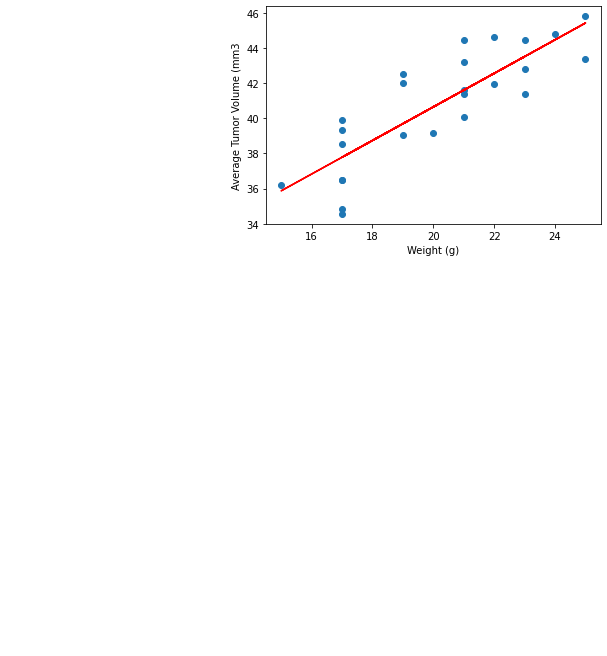

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

r = average_tumor_volume_df.corr().iloc[0,1].round(2)

print(f"The correlation between mouse weight and the average tumor volume is {r}")

x_values = average_tumor_volume_df["Weight (g)"]
y_values = average_tumor_volume_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3")
plt.show()